In [1]:
# Titanic Kaggle

In [2]:
import pandas as pd
datos = pd.read_csv("titanic_train.csv")

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

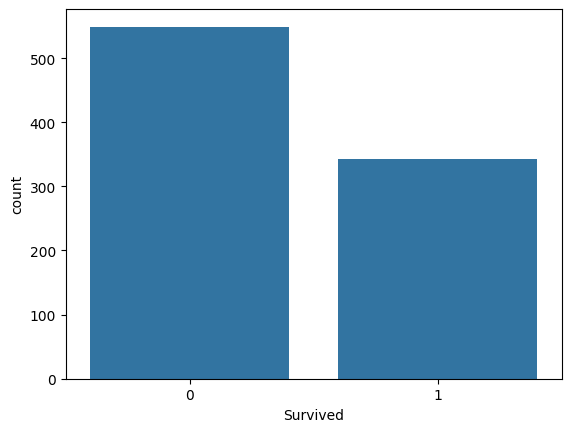

In [6]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

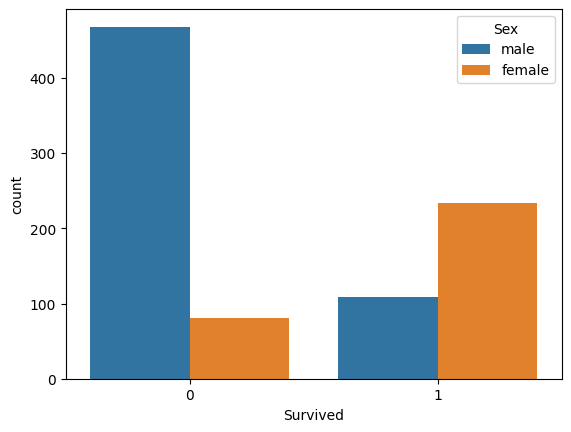

In [7]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [8]:
#Vamos a ver lo datos vacíos
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

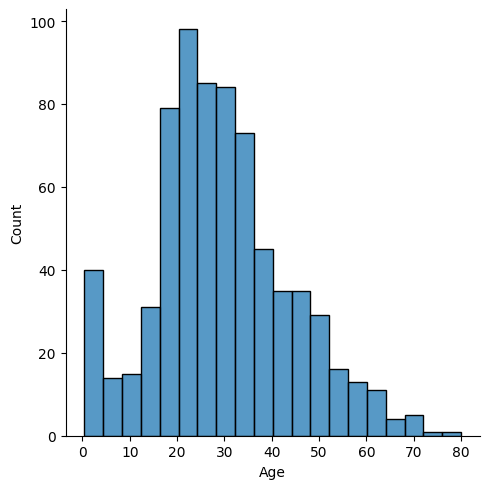

In [9]:
sb.displot(x="Age", data=datos) #, hue="Survived")

In [10]:
# Vamos a llenar los datos vacíos
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [11]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Ahora quitaremos la característica Cabin
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [16]:
# Ahora quitaremos los datos vacíos de Embarked
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
datos = datos.dropna()

In [18]:
datos.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
# Vemos como estamos y hay algunas cosas que todavía tenemos que quitar
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
datos = datos.drop(["PassengerId", "Name", "Ticket"], axis=1)

In [21]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
# Ahora hay que convertir "Sex" en una columna numérica
# Ponemos el drop_first para no ser redundante y segundo para 
# evitar MultiColinearity que sucede cuando el modelo encuentra 
# relaciones donde no debería haber y se concentra parte del 
# entrenamiento en esa parte, male/female.
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [23]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

In [24]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,True
1,1,1,38.0,1,0,71.2833,C,False
2,1,3,26.0,0,0,7.9250,S,False
3,1,1,35.0,1,0,53.1000,S,False
4,0,3,35.0,0,0,8.0500,S,True


<Axes: xlabel='Survived', ylabel='count'>

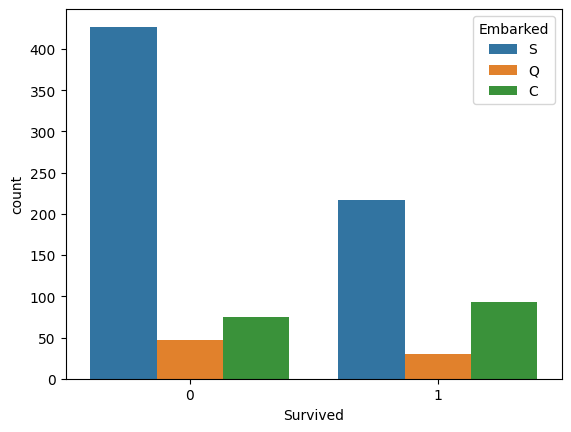

In [25]:
# Nos falta ver la columna de emcarcados, y vamos a hacer una gráfica para ver si es relevante verla
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [26]:
# no queda tan claro con la gráfica peor vamos a hacerlo
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

In [27]:
datos.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


<Axes: >

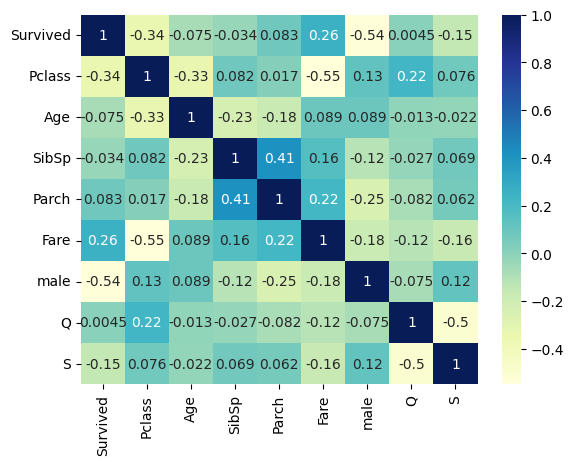

In [28]:
# Ahora si vamos a ver la correlación
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

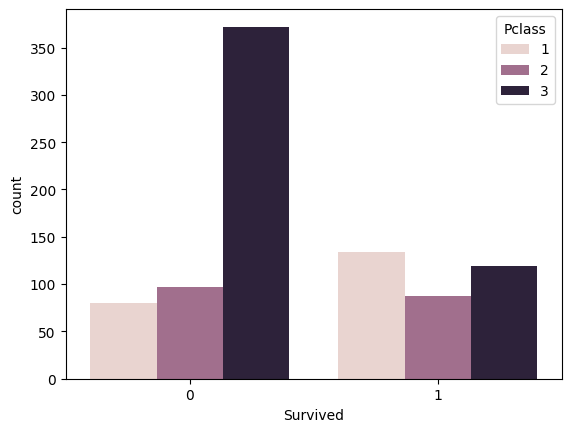

In [29]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

<Axes: xlabel='Survived', ylabel='count'>

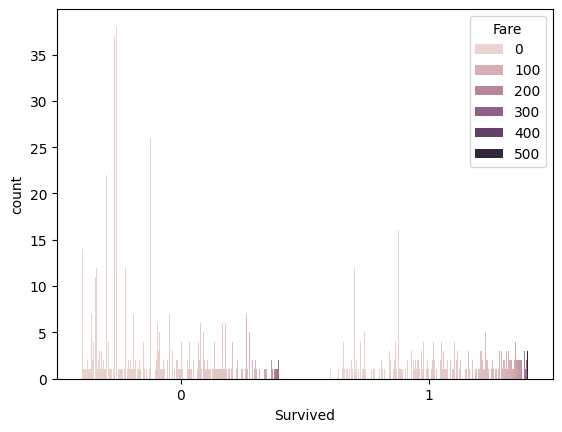

In [30]:
sb.countplot(x="Survived", data=datos, hue="Fare")

In [31]:
# Ya podemos entrenar
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [32]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)


# Árboles de desición

In [36]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.797752808988764

In [ ]:
# Podríamos estar probando con varios modelos y vamos a ver como le va a cada uno modificando hiper-parámetros del modelo.

In [43]:

resultados = []
for i in range(1,15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent, y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones)
    print(f"Reesultado para {i}: {exactitud}")
    resultados.append(exactitud)

Reesultado para 1: 0.7808988764044944
Reesultado para 2: 0.7808988764044944
Reesultado para 3: 0.8258426966292135
Reesultado para 4: 0.797752808988764
Reesultado para 5: 0.8314606741573034
Reesultado para 6: 0.8089887640449438
Reesultado para 7: 0.8033707865168539
Reesultado para 8: 0.8202247191011236
Reesultado para 9: 0.8202247191011236
Reesultado para 10: 0.797752808988764
Reesultado para 11: 0.797752808988764
Reesultado para 12: 0.7808988764044944
Reesultado para 13: 0.7921348314606742
Reesultado para 14: 0.797752808988764


<Axes: >

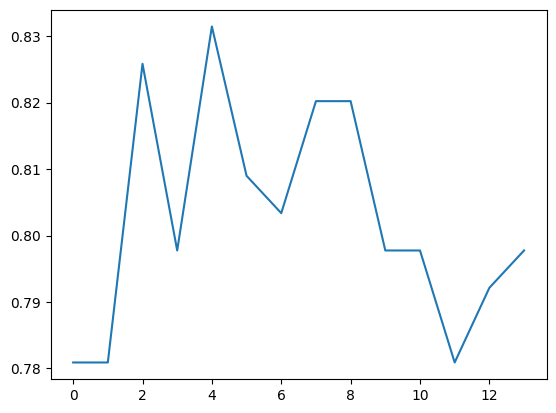

In [44]:
sb.lineplot(data=resultados)

In [45]:
# Vamos a tomar el 5 que da mejor resultado
# 
# Idealmente hacer iteraciones internas de otrosparámetros como
# cantidad de profundidad y otra para probar genie o entropia etc
# y elegir el mejor modelo

modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [46]:
# mejores resultados
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       107
           1       0.79      0.79      0.79        71

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [47]:
# mejores resultados
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[92, 15],
       [15, 56]])

[Text(0.4198717948717949, 0.9166666666666666, 'male <= 0.5\n0.47\n711\n[442, 269]\nMurió'),
 Text(0.16025641025641027, 0.75, 'Pclass <= 2.5\n0.389\n250\n[66, 184]\nVivió'),
 Text(0.2900641025641026, 0.8333333333333333, 'True  '),
 Text(0.05128205128205128, 0.5833333333333334, 'Age <= 2.5\n0.113\n133\n[8, 125]\nVivió'),
 Text(0.02564102564102564, 0.4166666666666667, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.07692307692307693, 0.4166666666666667, 'Fare <= 28.856\n0.1\n132\n[7, 125]\nVivió'),
 Text(0.05128205128205128, 0.25, 'Fare <= 28.231\n0.219\n56\n[7, 49]\nVivió'),
 Text(0.02564102564102564, 0.08333333333333333, '0.194\n55\n[6, 49]\nVivió'),
 Text(0.07692307692307693, 0.08333333333333333, '0.0\n1\n[1, 0]\nMurió'),
 Text(0.10256410256410256, 0.25, '0.0\n76\n[0, 76]\nVivió'),
 Text(0.2692307692307692, 0.5833333333333334, 'Fare <= 23.35\n0.5\n117\n[58, 59]\nVivió'),
 Text(0.20512820512820512, 0.4166666666666667, 'S <= 0.5\n0.484\n95\n[39.0, 56.0]\nVivió'),
 Text(0.15384615384615385, 0.25, 'Age 

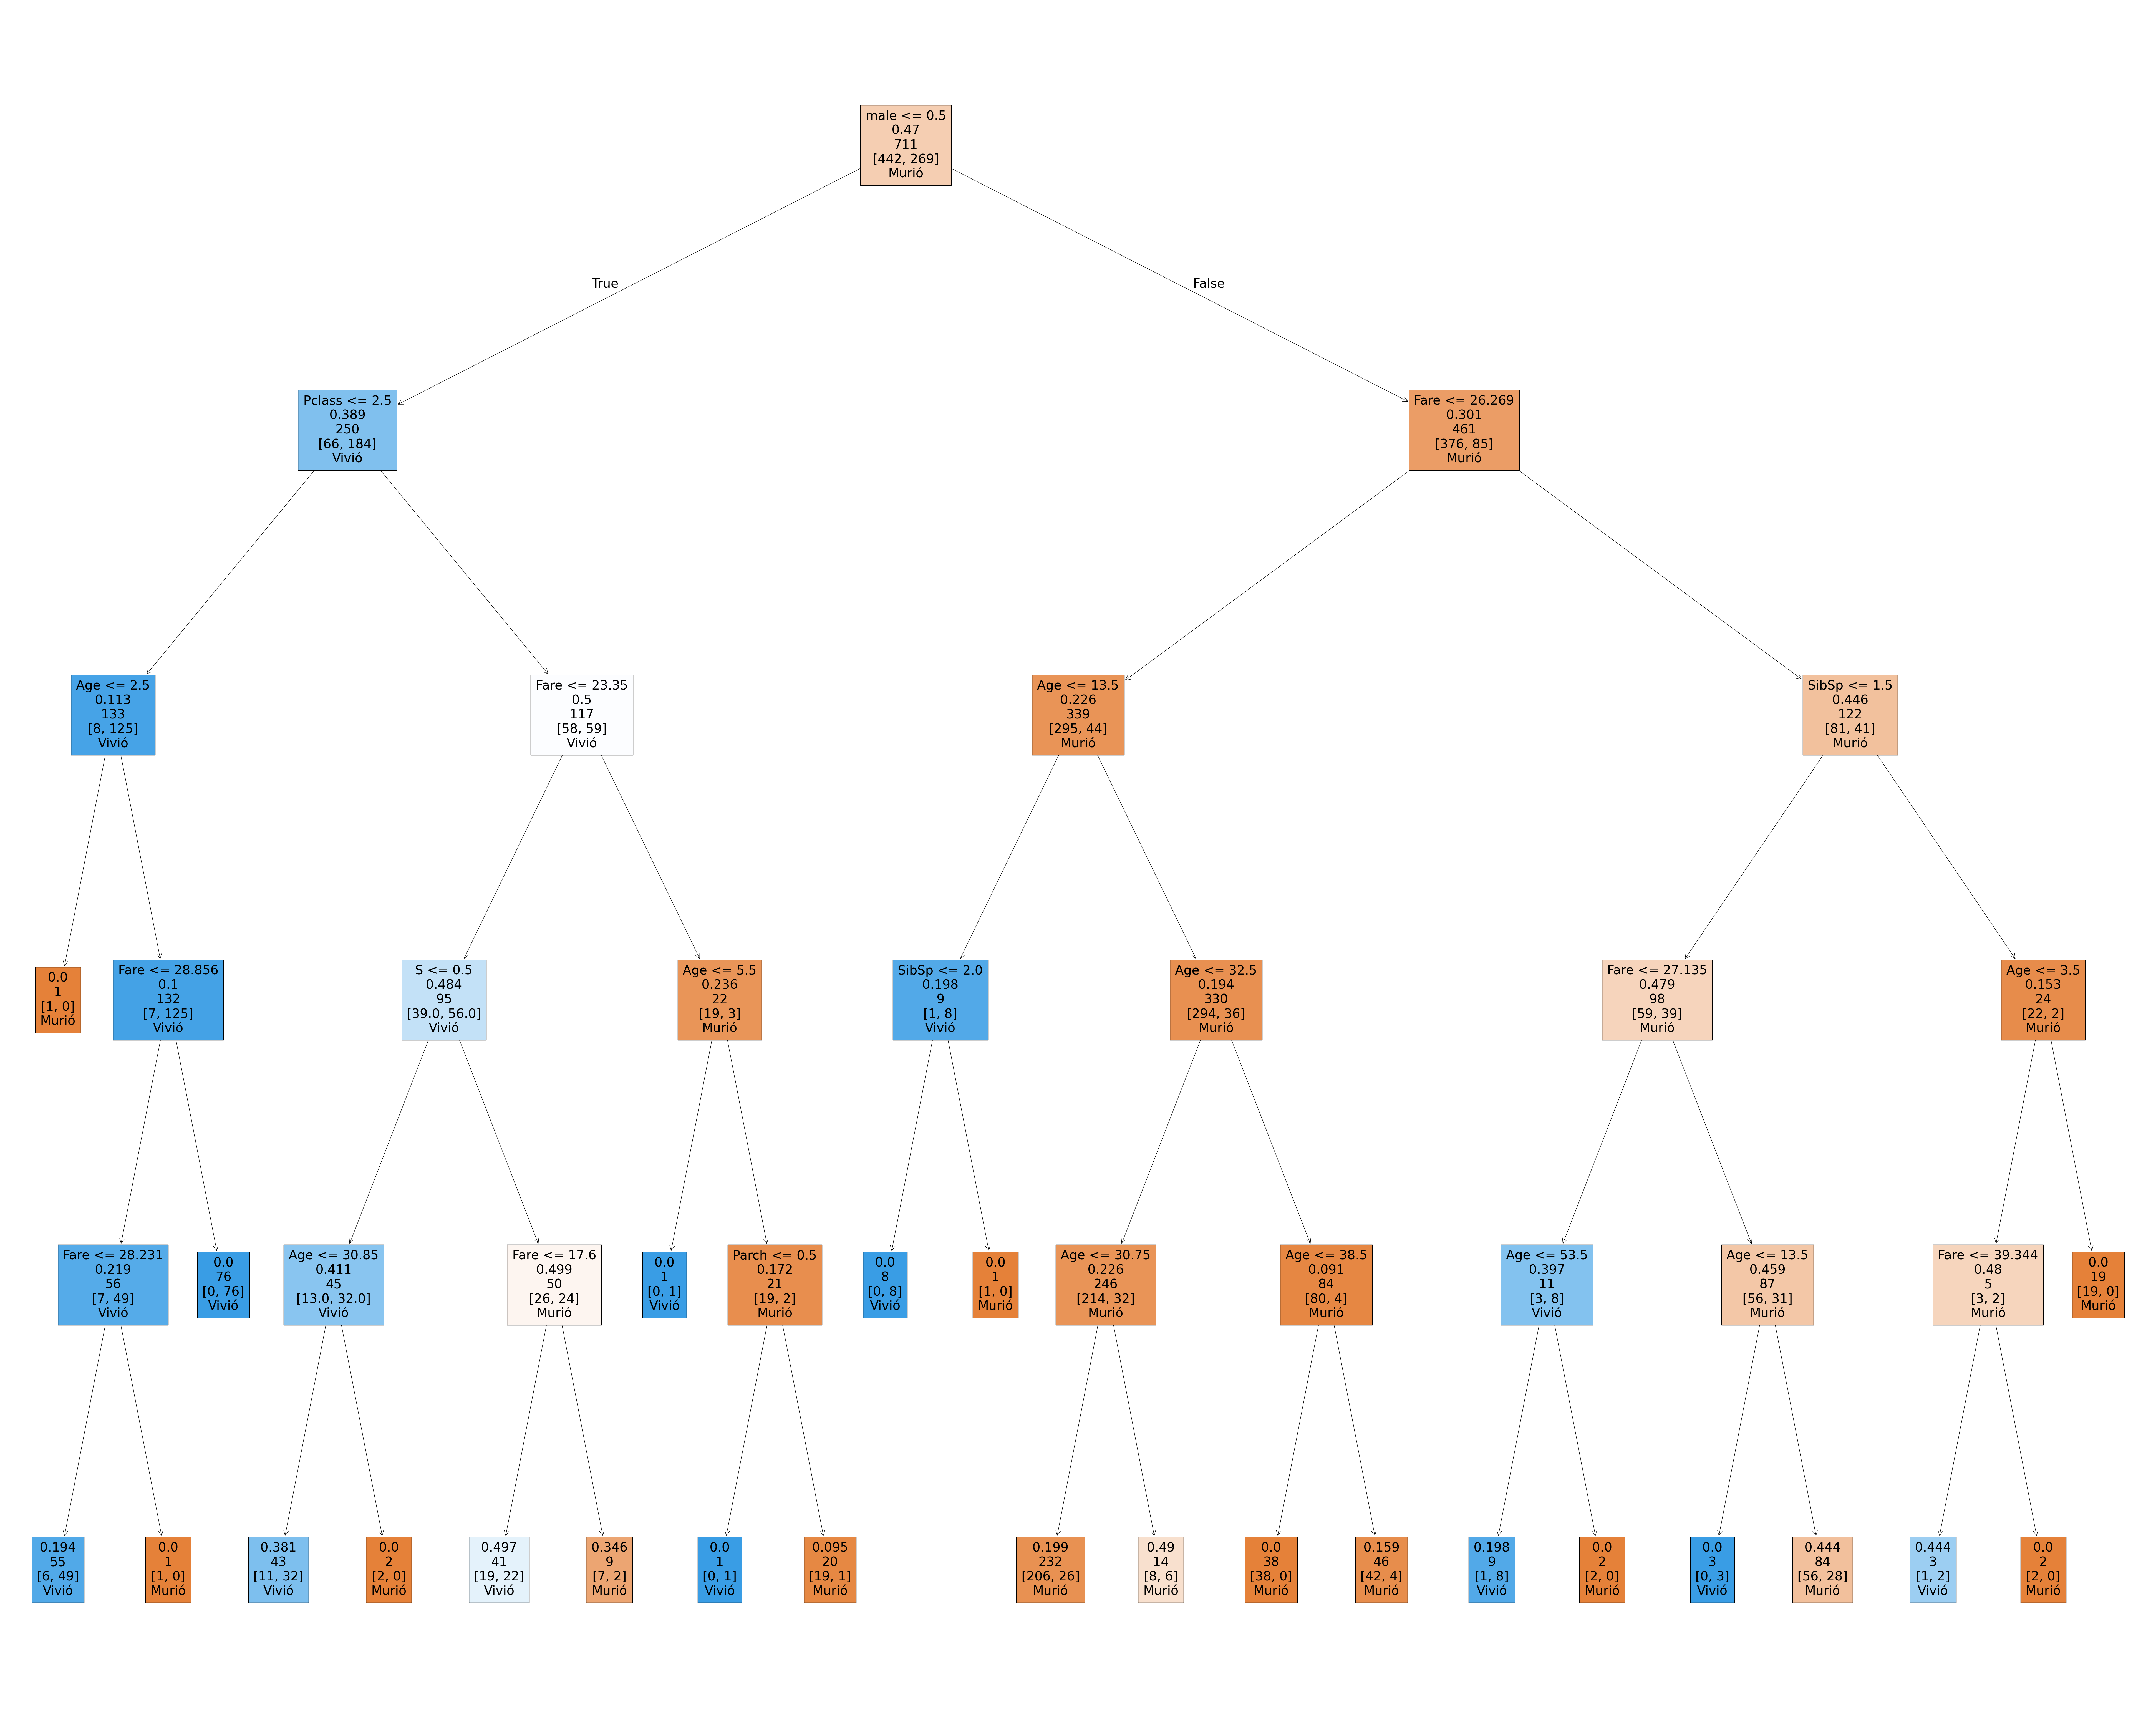

In [51]:
# La ventaja de este mpetodo es que podemos ver el árbol
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names = X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled = True,
    label = "none"
)

In [37]:
# Regresión logística
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7528089887640449

In [38]:
# El problema con este conjunto de datos es que no está perfectamente balancedo,
# no tenemos 50% sobrevivieron %50 no, si no la gran mayoría no sobrevivio, por eso
# la exactitud acá es una métrica que se puede ver confundida porque por ejemplo si
# siempre digo que no sobrevivió, debería estar bien la mayoría de las veces. Por
# tanto hay otras formas y otra información que podemos conocer.

In [39]:
# Aquí tenemos otras formsa en que mide que tan bien le está yendo a nuestro modelo.
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80       102
           1       0.75      0.63      0.69        76

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.75      0.75      0.75       178



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pru, predicciones)

array([[86, 16],
       [28, 48]])

In [41]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: no", "Real_si"])

,Pred: No,Pred: Si
Real: no,86,16
Real_si,28,48


In [42]:
# Esto nos dice que esta haciendo el modelo, cuando el modelo dijo que no
# en 89 efectivamente no, sin embargo en 25 predijo que no pero si habían
# sobrevivido. Sin embargo cuando dijo que si 17 no habían sobrevivido pero
# si lo tuvo correcto en 47.

In [43]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [44]:
nueva_persona = [1, 35, 0, 0, 80, 1, 0, 0]
prediccion = modelo.predict([nueva_persona])

print("Sobreviviste" if prediccion[0] == 1 else "No sobreviviste")

Sobreviviste


/home/matias/Documents/Cursos/DMSTK_AI_Python/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
